# Multinomial Logistic Regression Forecasting Model

### Steps:
1. **Dataset Information Gathering**
   - Explore the dataset and understand the available features.
   - Identify potential target and predictor variables for the model.
   - Check for missing values, data types, and overall structure.

2. **Data Cleaning**
     - Handle missing values
     - Encode categorical variables into numeric format where necessary (e.g., gender, race).
     - Normalize or scale features if required.

3. **Data Visualization**
   - Visualize relationships between predictors and the target variable.
   - Use histograms, box plots, and scatter plots to understand distributions.
   - Correlation heatmaps to check for multi collinearity.

4. **TensorFlow Model Training**
   - **Multinomial Logistic Regression Forecasting Model**:
     - Split the data into training and testing sets.
     - Build and compile a neural network model for multinomial logistic regression using TensorFlow.
     - Train the model on the training set.
5. **Evaluation and Scoring**
   - Evaluate the model on the test set and visualize the results.
       
   
### Goal
The objective of this project is to develop a Multinomial Logistic Regression model that predicts a person's vision status (Normal Vision, Visual Impairment, Blindness) based on demographic and health-related factors

**Example**:
#### **Input:**
| Age  | Gender | RiskFactor (Diabetes) | RiskFactor (Smoking) | RiskFactorResponse (Hypertension) |
|------|--------|-----------------------|----------------------|-----------------------------------|
| 50   | Male   | Yes                   | No                   | Yes                               |

#### **Output (Vision Status Prediction)**:
| Vision Status | Probability   |
|---------------|---------------|
| Normal vision | 0.60          |
| Visual impairment | 0.25      |
| Blindness     | 0.15          |


In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("data/National_Health_and_Nutrition_Examination_Survey_Vision_and_Eye_Health_Surveillance.csv", low_memory=True)

### Make a rough overview of all the Data

In [80]:
df.describe()

,YearStart,YearEnd,Data_Value,Low_Confidence_limit,High_Confidence_Limit,Numerator,Sample_Size,LocationID,DataValueTypeID,GeoLocation,Geographic Level
count,10320.000000,10320.0,6328.000000,6328.000000,6328.000000,0.0,8639.000000,10320.0,0.0,0.0,0.0
mean,2001.162791,2008.0,23.670702,20.277276,27.117668,NaN,1236.882278,59.0,NaN,NaN,NaN
std,2.880952,0.0,31.245569,30.055377,32.022886,NaN,2400.059894,0.0,NaN,NaN,NaN
min,1999.000000,2008.0,0.000000,0.000000,0.000000,NaN,30.000000,59.0,NaN,NaN,NaN
25%,1999.000000,2008.0,3.400000,2.200000,4.800000,NaN,155.000000,59.0,NaN,NaN,NaN
50%,1999.000000,2008.0,10.800000,7.700000,14.100000,NaN,453.000000,59.0,NaN,NaN,NaN
75%,2005.000000,2008.0,25.000000,17.700000,33.100000,NaN,1265.500000,59.0,NaN,NaN,NaN
max,2005.000000,2008.0,100.000000,99.300000,100.000000,NaN,35090.000000,59.0,NaN,NaN,NaN


### List of all Rows and there DataType

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10320 entries, 0 to 10319
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   YearStart                   10320 non-null  int64  
 1   YearEnd                     10320 non-null  int64  
 2   LocationAbbr                10320 non-null  object 
 3   LocationDesc                10320 non-null  object 
 4   DataSource                  10320 non-null  object 
 5   Topic                       10320 non-null  object 
 6   Category                    10320 non-null  object 
 7   Question                    10320 non-null  object 
 8   Response                    10320 non-null  object 
 9   Age                         10320 non-null  object 
 10  Gender                      10320 non-null  object 
 11  RaceEthnicity               10320 non-null  object 
 12  RiskFactor                  10320 non-null  object 
 13  RiskFactorResponse          103

### List of First 5 Rows

In [111]:
df.head()

,Category,Question,Response,Age,Gender,RaceEthnicity,RiskFactor,RiskFactorResponse
0,Blind or Difficulty Seeing,Percentage of people blind in both eyes,Yes,All ages,Female,All races,Diabetes,No
1,Measured Visual Acuity,Best-corrected visual acuity,Visual impairment,40-64 years,All genders,Other,Smoking,Yes
2,Measured Visual Acuity,Best-corrected visual acuity,US-defined blindness,12-17 years,Male,Other,Diabetes,No
3,Blind or Difficulty Seeing,Percentage of people blind in both eyes,Yes,All ages,Female,Other,Diabetes,Yes
4,Blind or Difficulty Seeing,Percentage of people blind in both eyes,Yes,18-39 years,Female,"Black, non-Hispanic",Diabetes,No


### Percentage of Values that are Null

In [83]:
round(df.isnull().sum().sum() / df.count().sum(), 3)

0.222

### Check for Duplicate values

In [84]:
df.duplicated().sum()

0

### Data Cleaning 

**Rows to remove for Multinomial Logistic Regression to predicting vision status**
- YearStart
- YearEnd
- LocationDesc
- DataSource
- TopicType
- Data_Value_Unit
- DataValueTypeID
- Data_Value_Alt
- GeoLocation
- LowConfidenceLimit
- HighConfidenceLimit
- Sample_Size
- Data_Value_Footnote_Symbol
- Data_Value_Footnote
- ResponseID
- QuestionID
- StratificationID


In [85]:
df.drop(columns=['YearStart', 'YearEnd', 'LocationDesc', 'DataSource', 'Topic', 
                 'Data_Value_Unit', 'DataValueTypeID', 'Data_Value_Type', 'GeoLocation', 
                 'Low_Confidence_limit', 'High_Confidence_Limit', 'Sample_Size', 
                 'Data_Value_Footnote_Symbol', 'Data_Value_Footnote', 'ResponseID',
                 'QuestionID', 'LocationAbbr', 'Numerator', 'LocationID', 'RiskFactorID', 'RiskFactorResponseID',  'Geographic Level',
                 'Data_Value','TopicID','CategoryID','AgeID','GenderID', 'RaceEthnicityID'
                 ], inplace=True)

## Print Cleaned Data

In [86]:
df.head()

,Category,Question,Response,Age,Gender,RaceEthnicity,RiskFactor,RiskFactorResponse
0,Blind or Difficulty Seeing,Percentage of people blind in both eyes,Yes,All ages,Female,All races,Diabetes,No
1,Measured Visual Acuity,Best-corrected visual acuity,Visual impairment,40-64 years,All genders,Other,Smoking,Yes
2,Measured Visual Acuity,Best-corrected visual acuity,US-defined blindness,12-17 years,Male,Other,Diabetes,No
3,Blind or Difficulty Seeing,Percentage of people blind in both eyes,Yes,All ages,Female,Other,Diabetes,Yes
4,Blind or Difficulty Seeing,Percentage of people blind in both eyes,Yes,18-39 years,Female,"Black, non-Hispanic",Diabetes,No


### Unique Questions

In [87]:
df["Question"].unique()

array(['Percentage of people blind in both eyes',
       'Best-corrected visual acuity',
       'Percentage of people with diabetic retinopathy, based on examination',
       'Percentage of people who had a cataract operation',
       'Presenting visual acuity',
       'Percentage of people ever told by an eye doctor they have glaucoma',
       'Percentage of people who were ever told by an eye doctor they have age-related macular degeneration',
       'Percentage of people with age-related macular degeneration, based on examination',
       'Uncorrected Refractive Error (URE)',
       'Percentage of people with glaucoma, based on examination',
       'Percentage of people who were ever told by an eye doctor their diabetes affected their eyes'],
      dtype=object)

### Unique Answers to "Presenting visual acuity"

In [88]:
presenting_visual_acuity = df[df['Question'] == 'Presenting visual acuity']['Response'].unique()

### Unique Answers to "Best-corrected visual acuity"

In [89]:
best_corrected_visual_acuity = df[df['Question'] == 'Best-corrected visual acuity']['Response'].unique()

### Save Cleaned Data

In [113]:
df.to_csv(r'data/Vision_Survey_Cleaned.csv', header=True, index=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10320 entries, 0 to 10319
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Category            10320 non-null  object
 1   Question            10320 non-null  object
 2   Response            10320 non-null  object
 3   Age                 10320 non-null  object
 4   Gender              10320 non-null  object
 5   RaceEthnicity       10320 non-null  object
 6   RiskFactor          10320 non-null  object
 7   RiskFactorResponse  10320 non-null  object
dtypes: object(8)
memory usage: 645.1+ KB


### Data Visualization
* Age Distribution of People that smokes
* Age Distribution of People that have Diabetes
* Age Distribution of People that have Hypertension

## Distribution of People that smokes

Text(0.5, 1.0, 'Age Distribution of Smokers')

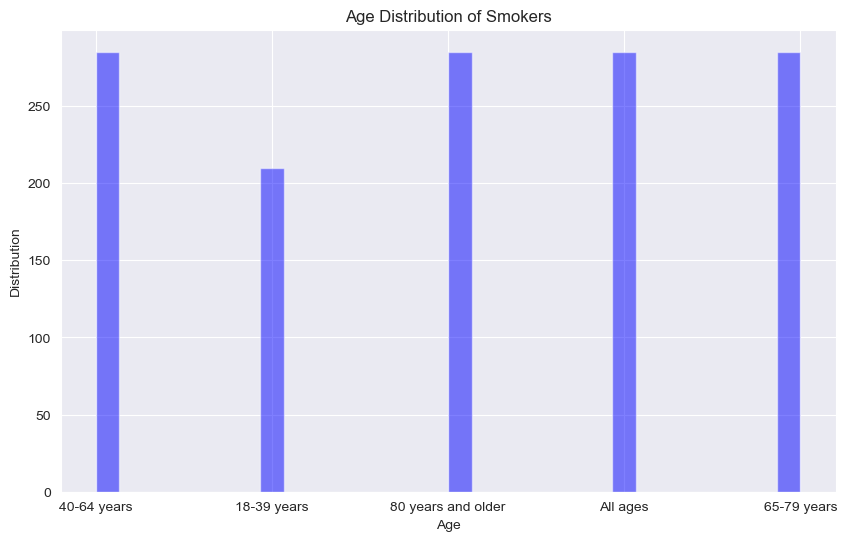

In [91]:
plt.figure(figsize=(10, 6))
plt.hist(df[( df['RiskFactor'] == 'Smoking') & ( df['RiskFactorResponse'] == 'Yes')]['Age'], bins=30, color='blue', alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Distribution')
plt.title('Age Distribution of Smokers')

Age Distribution of People that have Diabetes

Text(0.5, 1.0, 'Age Distribution of Diabetes')

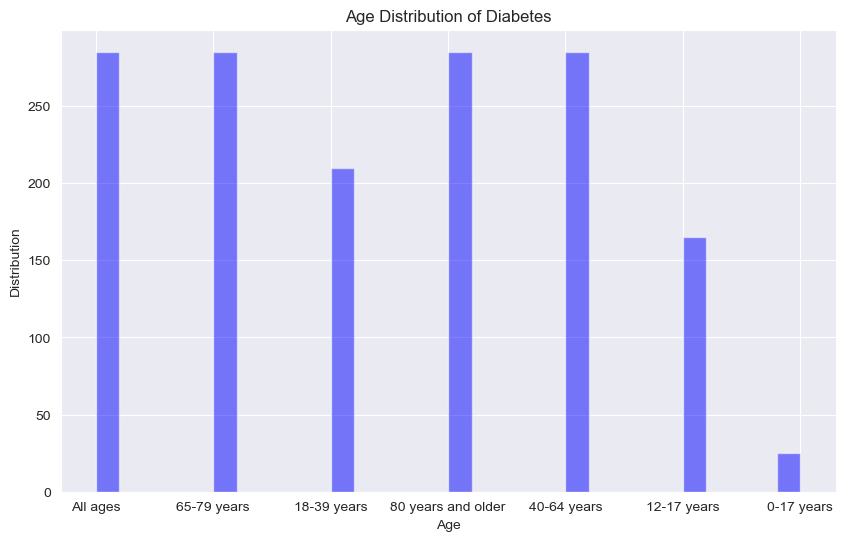

In [98]:
plt.figure(figsize=(10, 6))
plt.hist(df[( df['RiskFactor'] == 'Diabetes') & ( df['RiskFactorResponse'] == 'Yes')]['Age'], bins=30, color='blue', alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Distribution')
plt.title('Age Distribution of Diabetes')

### Age Distribution of People that have Hypertension

Text(0.5, 1.0, 'Age Distribution of Hypertension')

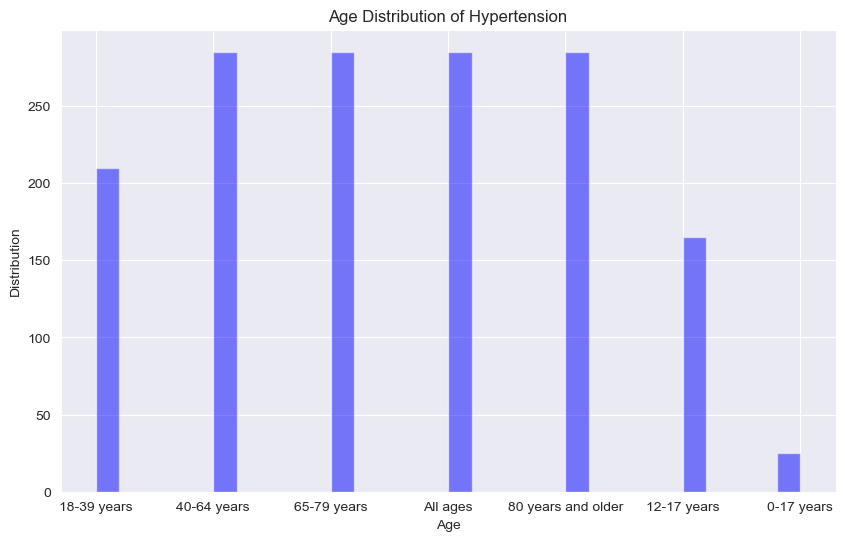

In [100]:
plt.figure(figsize=(10, 6))
plt.hist(df[( df['RiskFactor'] == 'Hypertension') & ( df['RiskFactorResponse'] == 'Yes')]['Age'], bins=30, color='blue', alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Distribution')
plt.title('Age Distribution of Hypertension')

### Merged Data Visualization from above

* How many smokers have Diabetes and Hypertension
* How many people with Diabetes have Hypertension
* How many have Diabetes and Hypertension



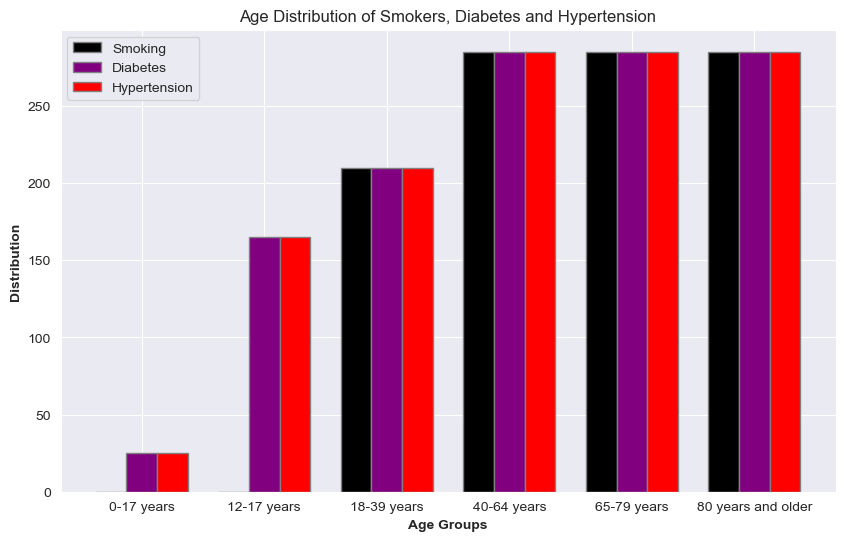

In [106]:
# Age Groups
age_groups = ['0-17 years', '12-17 years', '18-39 years', '40-64 years', '65-79 years', '80 years and older']

# Count of each Risk Factor based on Age Group
smoking_counts = [df[(df['Age'] == age_group) & (df['RiskFactor'] == 'Smoking') & (df['RiskFactorResponse'] == 'Yes')].shape[0] for age_group in age_groups]
diabetes_counts = [df[(df['Age'] == age_group) & (df['RiskFactor'] == 'Diabetes') & (df['RiskFactorResponse'] == 'Yes')].shape[0] for age_group in age_groups]
hypertension_counts = [df[(df['Age'] == age_group) & (df['RiskFactor'] == 'Hypertension') & (df['RiskFactorResponse'] == 'Yes')].shape[0] for age_group in age_groups]

# Plotting the Bar Graph Calculate the width of the bars and the spacing between them
bar_width = 0.25
r1 = np.arange(len(age_groups))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Set the bars next to each other
plt.figure(figsize=(10, 6))
plt.bar(r1, smoking_counts, color='black', width=bar_width, edgecolor='grey', label='Smoking')
plt.bar(r2, diabetes_counts, color='purple', width=bar_width, edgecolor='grey', label='Diabetes')
plt.bar(r3, hypertension_counts, color='red', width=bar_width, edgecolor='grey', label='Hypertension')

# Adding Labels and Title
plt.xlabel('Age Groups', fontweight='bold')
plt.ylabel('Distribution', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(age_groups))], age_groups)
plt.title('Age Distribution of Smokers, Diabetes and Hypertension')

plt.legend()
plt.show()

### Testing

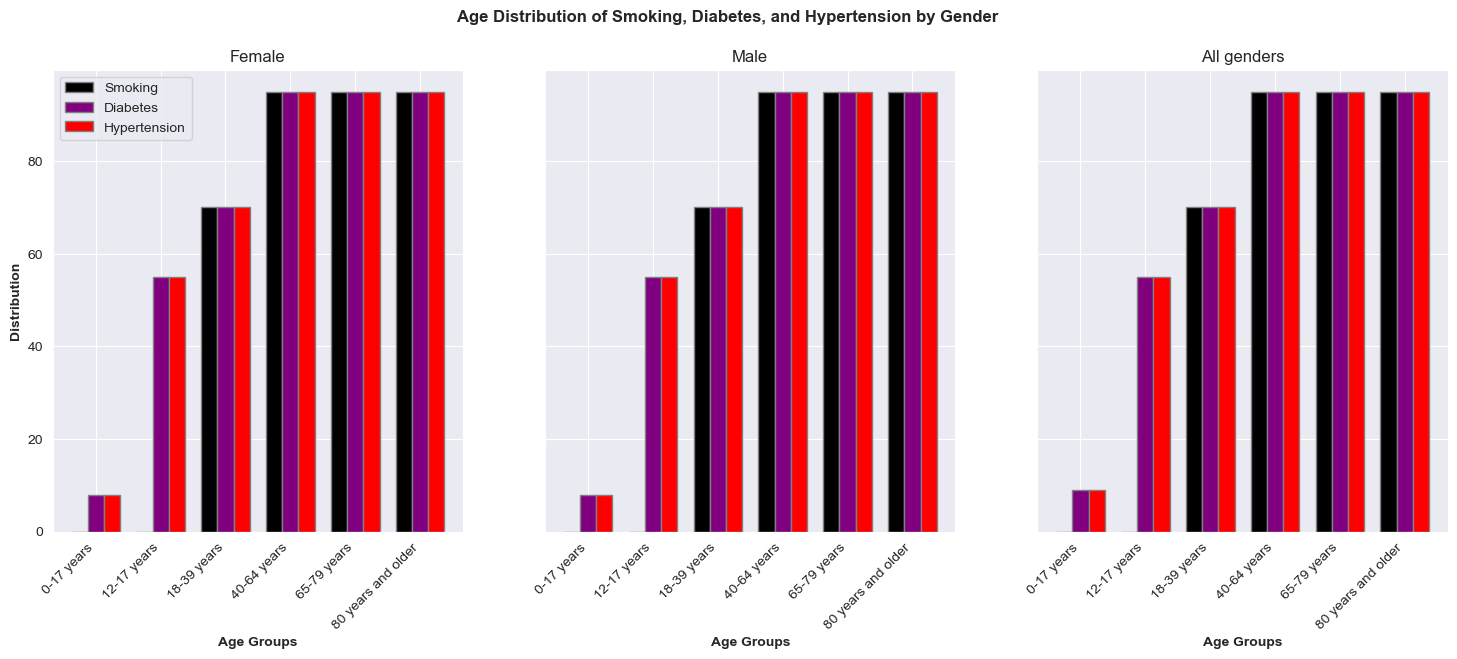

In [107]:
genders = ['Female', 'Male', 'All genders']
risk_factors = ['Smoking', 'Diabetes', 'Hypertension']

# Dictionary to store data for subplots
risk_counts_by_gender = {gender: {'Smoking': [], 'Diabetes': [], 'Hypertension': []} for gender in genders}

# Get Bar height for each Age Group based on the gender
for gender in genders:
    for age_group in age_groups:
        smoking_count = df[(df['Age'] == age_group) & (df['RiskFactor'] == 'Smoking') & (df['Gender'] == gender) & (df['RiskFactorResponse'] == 'Yes')].shape[0]
        diabetes_count = df[(df['Age'] == age_group) & (df['RiskFactor'] == 'Diabetes') & (df['Gender'] == gender) & (df['RiskFactorResponse'] == 'Yes')].shape[0]
        hypertension_count = df[(df['Age'] == age_group) & (df['RiskFactor'] == 'Hypertension') & (df['Gender'] == gender) & (df['RiskFactorResponse'] == 'Yes')].shape[0]
        
        risk_counts_by_gender[gender]['Smoking'].append(smoking_count)
        risk_counts_by_gender[gender]['Diabetes'].append(diabetes_count)
        risk_counts_by_gender[gender]['Hypertension'].append(hypertension_count)

fig, axes = plt.subplots(nrows=1, ncols=len(genders), figsize=(18, 6), sharey=True)
fig.suptitle('Age Distribution of Smoking, Diabetes, and Hypertension by Gender', fontweight='bold')

for idx, gender in enumerate(genders):
    r1 = np.arange(len(age_groups))
    r2 = [x + bar_width for x in r1]
    r3 = [x + bar_width for x in r2]
    
    axes[idx].bar(r1, risk_counts_by_gender[gender]['Smoking'], color='black', width=bar_width, edgecolor='grey', label='Smoking')
    axes[idx].bar(r2, risk_counts_by_gender[gender]['Diabetes'], color='purple', width=bar_width, edgecolor='grey', label='Diabetes')
    axes[idx].bar(r3, risk_counts_by_gender[gender]['Hypertension'], color='red', width=bar_width, edgecolor='grey', label='Hypertension')
    
    axes[idx].set_xlabel('Age Groups', fontweight='bold')
    axes[idx].set_xticks([r + bar_width for r in range(len(age_groups))])
    axes[idx].set_xticklabels(age_groups, rotation=45, ha='right')
    axes[idx].set_title(f'{gender}')
    
axes[0].set_ylabel('Distribution', fontweight='bold')
axes[0].legend(loc='upper left')

plt.show()

### Distribution of the Vision Status of People that Smokes, have Diabetes and have Hypertension based on Gender based on the question "Presenting visual acuity"

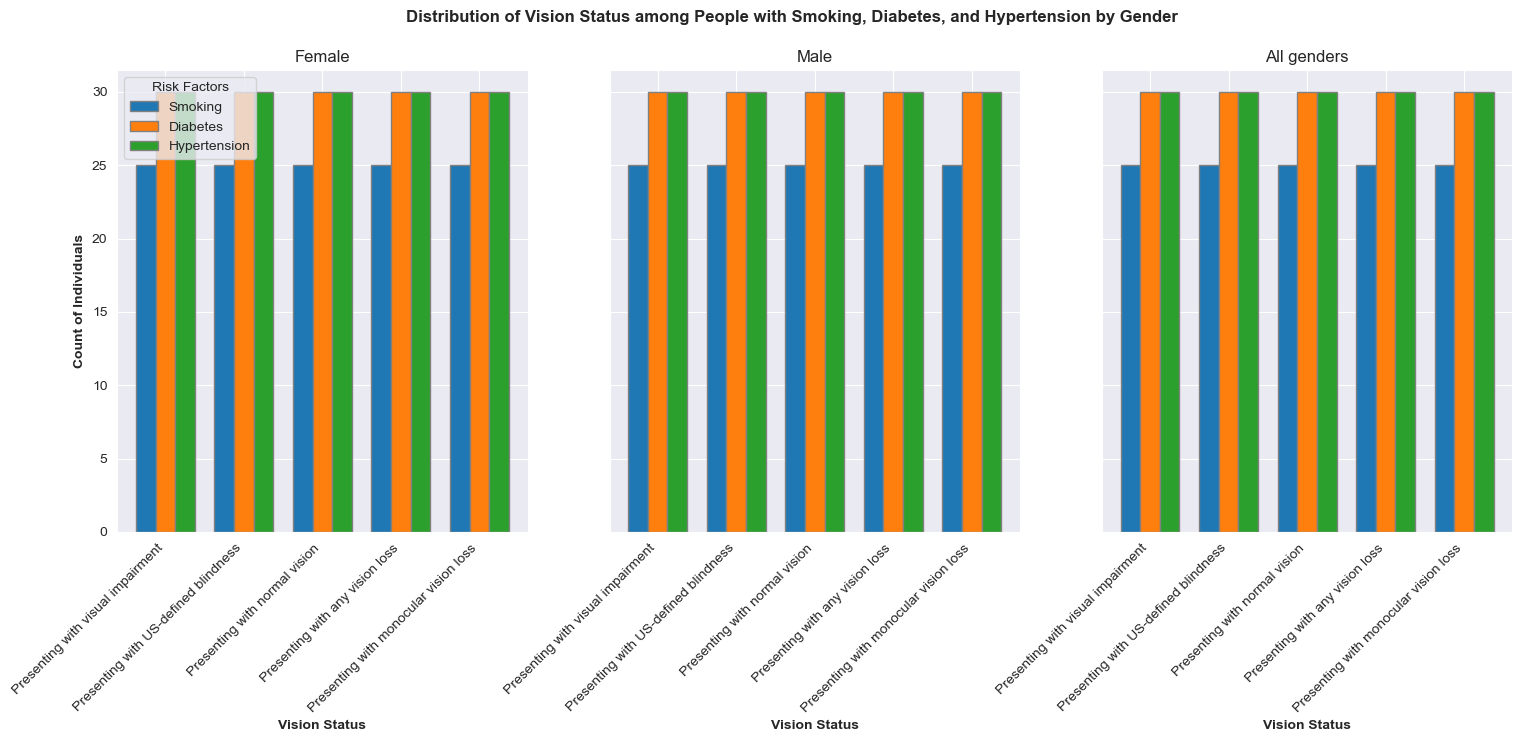

In [108]:
vision_risk_counts_by_gender = {gender: {risk: {status: 0 for status in presenting_visual_acuity} for risk in risk_factors} for gender in genders}

for gender in genders:
    for risk in risk_factors:
        for status in presenting_visual_acuity:
            count = df[
                (df['Gender'] == gender) &
                (df['RiskFactor'] == risk) &
                (df['Question'] == 'Presenting visual acuity') &
                (df['Response'] == status) & 
                (df['RiskFactorResponse'] == 'Yes')
            ].shape[0]
            vision_risk_counts_by_gender[gender][risk][status] = count

fig, axes = plt.subplots(nrows=1, ncols=len(genders), figsize=(18, 6), sharey=True)
fig.suptitle('Distribution of Vision Status among People with Smoking, Diabetes, and Hypertension by Gender', fontweight='bold')

for idx, gender in enumerate(genders):
    r = [np.arange(len(presenting_visual_acuity)) + bar_width * i for i in range(len(risk_factors))]
    for i, risk in enumerate(risk_factors):
        axes[idx].bar(r[i], [vision_risk_counts_by_gender[gender][risk][status] for status in presenting_visual_acuity], 
                      width=bar_width, edgecolor='grey', label=risk)
    
    axes[idx].set_xlabel('Vision Status', fontweight='bold')
    axes[idx].set_xticks([pos + bar_width for pos in range(len(presenting_visual_acuity))])
    axes[idx].set_xticklabels(presenting_visual_acuity, rotation=45, ha='right')
    axes[idx].set_title(f'{gender}')

axes[0].set_ylabel('Count of Individuals', fontweight='bold')
axes[0].legend(loc='upper left', title='Risk Factors')

plt.show()

### Distribution of the Vision Status of People that Smokes, have Diabetes and have Hypertension based on Gender based on the question "Best-corrected visual acuity"

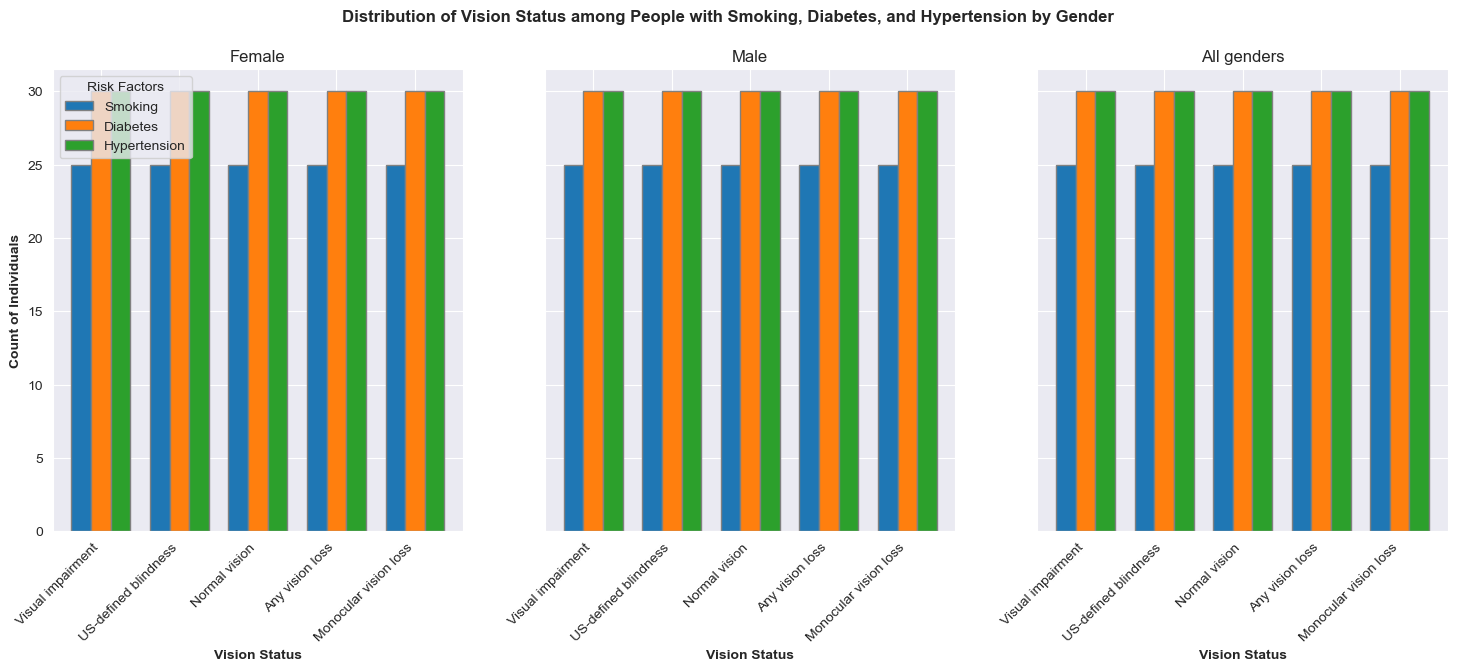

In [109]:
vision_risk_counts_by_gender = {gender: {risk: {status: 0 for status in best_corrected_visual_acuity} for risk in risk_factors} for gender in genders}

for gender in genders:
    for risk in risk_factors:
        for status in best_corrected_visual_acuity:
            count = df[
                (df['Gender'] == gender) &
                (df['RiskFactor'] == risk) &
                (df['Question'] == 'Best-corrected visual acuity') &
                (df['Response'] == status) & 
                (df['RiskFactorResponse'] == 'Yes')
            ].shape[0]
            vision_risk_counts_by_gender[gender][risk][status] = count

fig, axes = plt.subplots(nrows=1, ncols=len(genders), figsize=(18, 6), sharey=True)
fig.suptitle('Distribution of Vision Status among People with Smoking, Diabetes, and Hypertension by Gender', fontweight='bold')

for idx, gender in enumerate(genders):
    r = [np.arange(len(best_corrected_visual_acuity)) + bar_width * i for i in range(len(risk_factors))]
    for i, risk in enumerate(risk_factors):
        axes[idx].bar(r[i], [vision_risk_counts_by_gender[gender][risk][status] for status in best_corrected_visual_acuity], 
                      width=bar_width, edgecolor='grey', label=risk)
    
    axes[idx].set_xlabel('Vision Status', fontweight='bold')
    axes[idx].set_xticks([pos + bar_width for pos in range(len(best_corrected_visual_acuity))])
    axes[idx].set_xticklabels(best_corrected_visual_acuity, rotation=45, ha='right')
    axes[idx].set_title(f'{gender}')

axes[0].set_ylabel('Count of Individuals', fontweight='bold')
axes[0].legend(loc='upper left', title='Risk Factors')

plt.show()

### Patterns 

* Every Vision Status has the same amount of people 